# Resolution, Balance and Normalize

In [1]:
import coolbox
from coolbox.api import *

In [2]:
coolbox.__version__

'0.3.0'

## Resolution

In normal, CoolBox will select proper resolution automatically from your
multi-resolution `.hic` or `.mcool` file, but you can also specify it
by your self.

In [3]:
test_hic = "../../../tests/test_data/dothic_chr9_4000000_6000000.hic"

10Kb resolution:

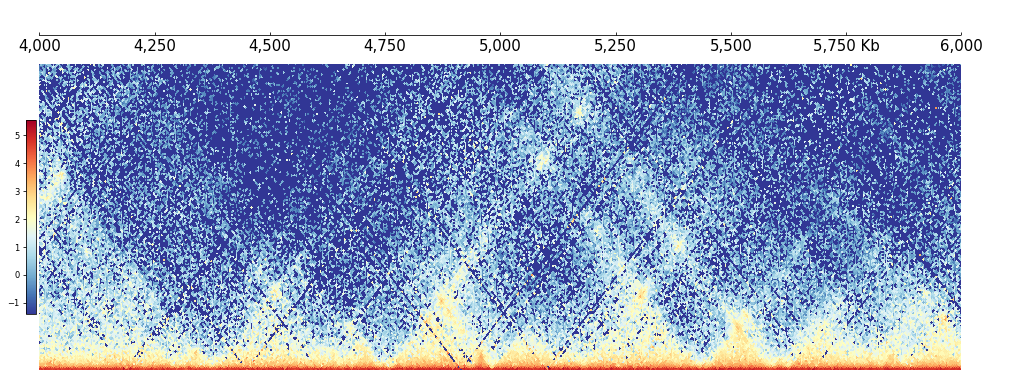

In [4]:
dhic = DotHiC(test_hic, cmap="RdYlBu_r", depth_ratio=.5, resolution=10000)
frame = XAxis() + dhic
frame.plot("chr9:4000000-6000000")

25Kb resolution:

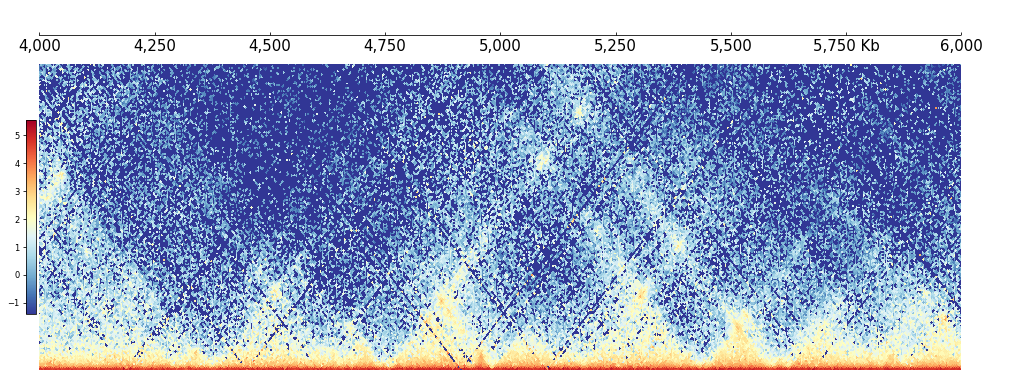

In [5]:
dhic = DotHiC(test_hic, cmap="RdYlBu_r", depth_ratio=.5, resolution=25000)
frame = XAxis() + dhic
frame.plot("chr9:4000000-6000000")

## Balance

You can use `balance` to control do matrix balance or not.
The default behavior do balance, we can turn off it:

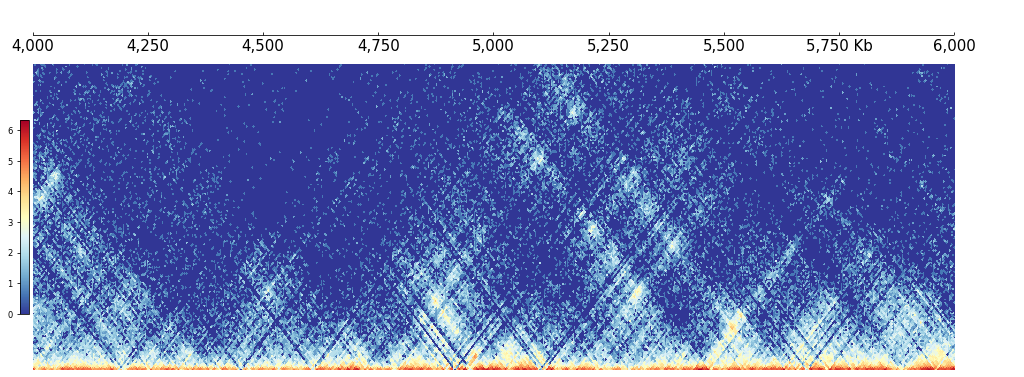

In [6]:
dhic = DotHiC(test_hic, balance=False, cmap="RdYlBu_r", depth_ratio=.5, resolution=10000)
frame = XAxis() + dhic
frame.plot("chr9:4000000-6000000")

In addition, `.hic` file support three kinds of matrix balance method:
* VC
* VC_SQRT
* KR (default)

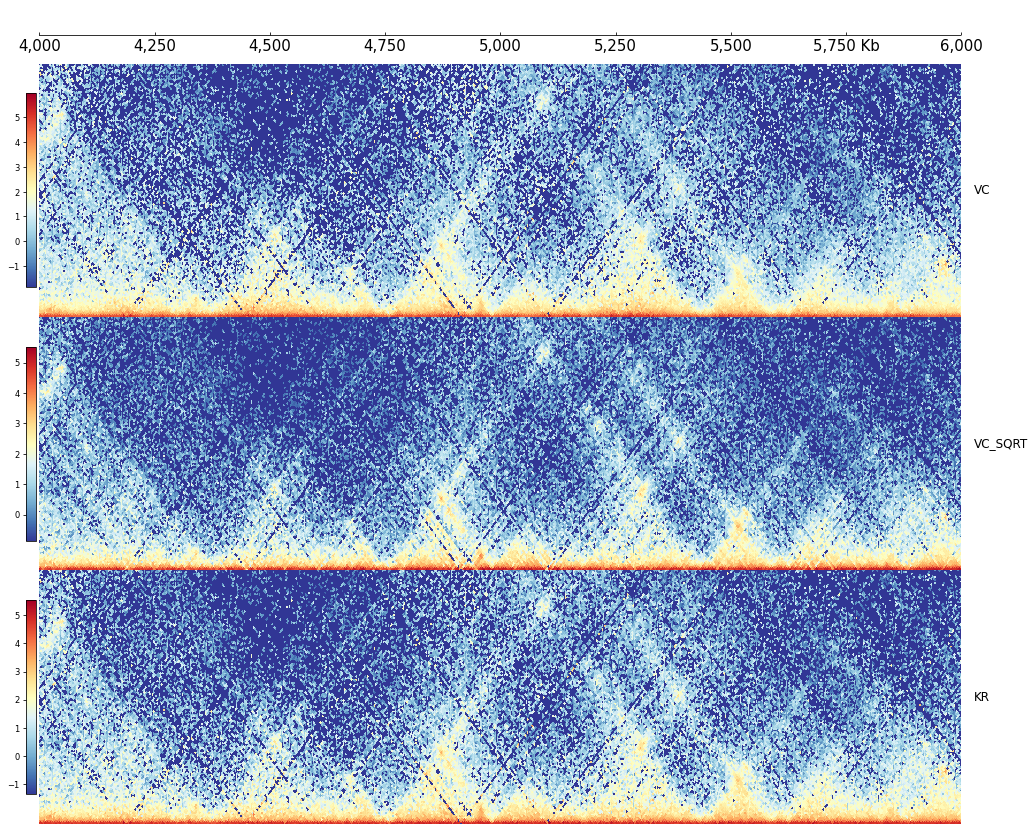

In [7]:
with Feature(resolution=10000), Feature(depth_ratio=0.4), Color("RdYlBu_r"):
    dhic_vc = DotHiC(test_hic, balance="VC")
    dhic_vcs = DotHiC(test_hic, balance="VC_SQRT")
    dhic_kr = DotHiC(test_hic, balance="KR")

frame = XAxis() + \
    dhic_vc + Title("VC") + \
    dhic_vcs + Title("VC_SQRT") + \
    dhic_kr + Title("KR")
frame.plot("chr9:4000000-6000000")

## Normalize

CoolBox can perform three kinds of normazation on the matrix(balanced or non-balanced):

- total: Divide the total value of the local region.
- expect: Divide the mean value alone the specifed distance dialog.
- zscore: (matrix - mean) / std

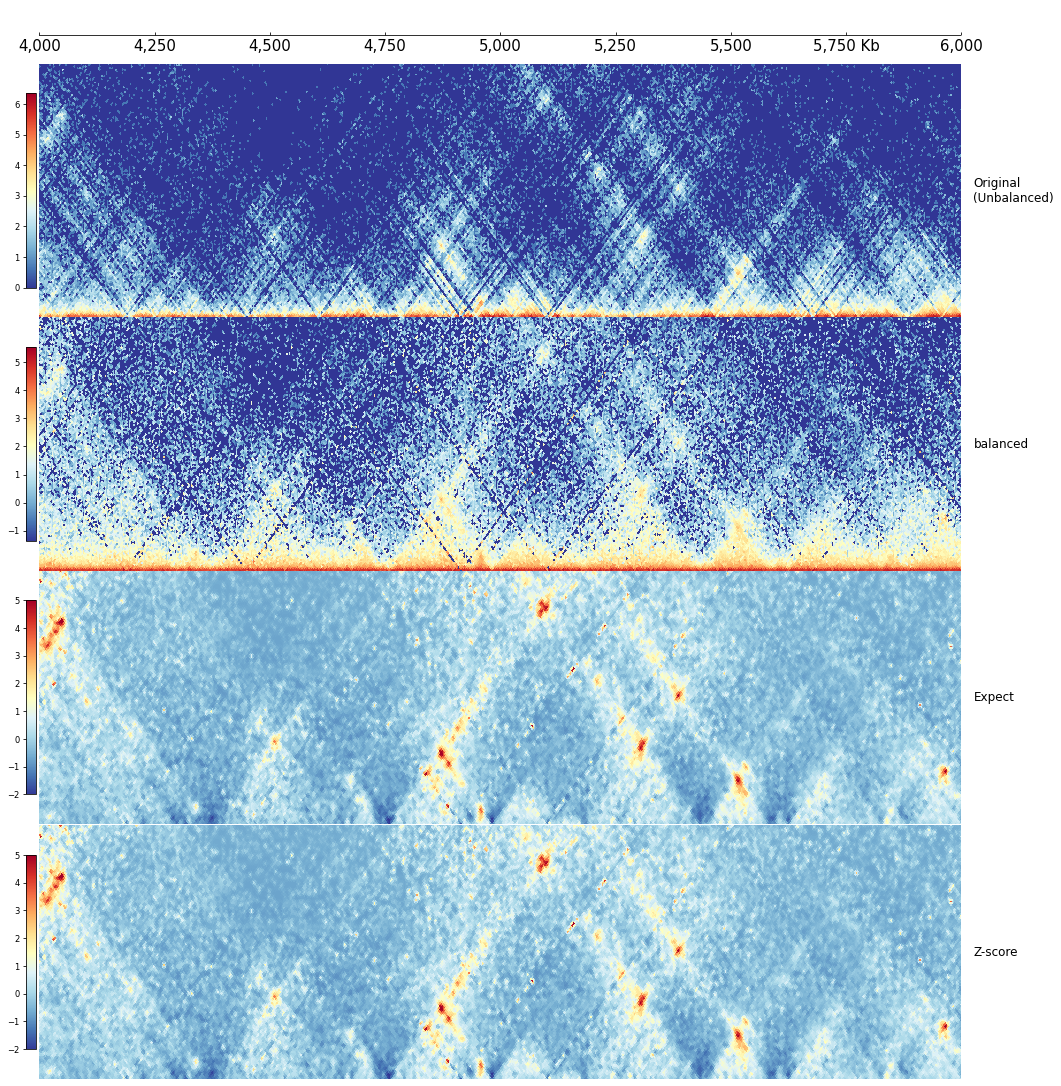

In [8]:
with Feature(resolution=10000, depth_ratio=0.4, color="RdYlBu_r"):
    dhic_b = DotHiC(test_hic, balance="KR")
    dhic_ub = DotHiC(test_hic, balance=False)
    with Feature(transform=False, norm=False, gaussian_sigma=0.7, max_value=5, min_value=-2):
        dhic_exp = DotHiC(test_hic, normalize='expect')
        dhic_z = DotHiC(test_hic, normalize='zscore')

frame = XAxis() + \
    dhic_ub + Title("Original\n(Unbalanced)") + \
    dhic_b + Title("balanced") + \
    dhic_exp + Title("Expect") + \
    HLine() + \
    dhic_z + Title("Z-score")
frame.plot("chr9:4000000-6000000")